In [4]:
#https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [6]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [7]:
df.describe(exclude='number')

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [8]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [9]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [10]:
#df["h1n1_awareness"].shape
#df["dr_recc_h1n1_vacc"].shape
df["no_of_children"].unique()
#df["h1n1_worry"].unique()

array([ 0.,  3.,  2.,  1., nan])

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

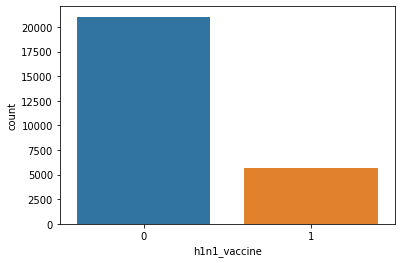

In [11]:
sns.countplot(x="h1n1_vaccine",data=df)

In [12]:
pd.crosstab(df["h1n1_vaccine"],df["sex"])

sex,Female,Male
h1n1_vaccine,,
0,12378,8655
1,3480,2194


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

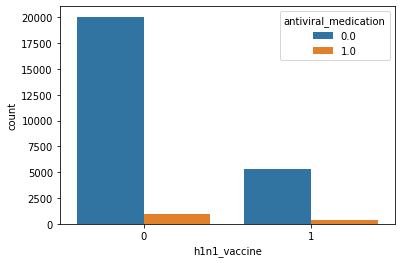

In [13]:
sns.countplot(x="h1n1_vaccine",hue="antiviral_medication",data=df)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

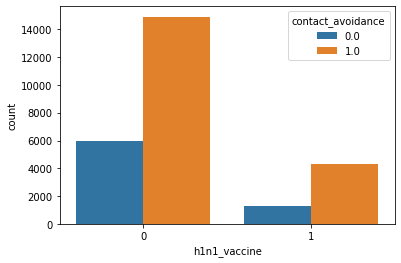

In [14]:
sns.countplot(x="h1n1_vaccine",hue="contact_avoidance",data=df)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

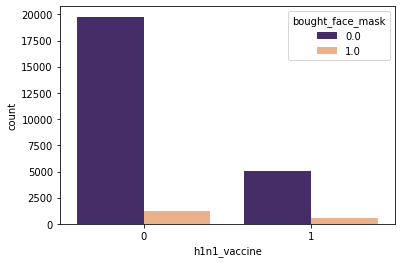

In [15]:
sns.countplot(x="h1n1_vaccine",hue="bought_face_mask",data=df,palette=['#432371',"#FAAE7B"])
# ax[0].set_color('r')
# ax[1].set_color('y')

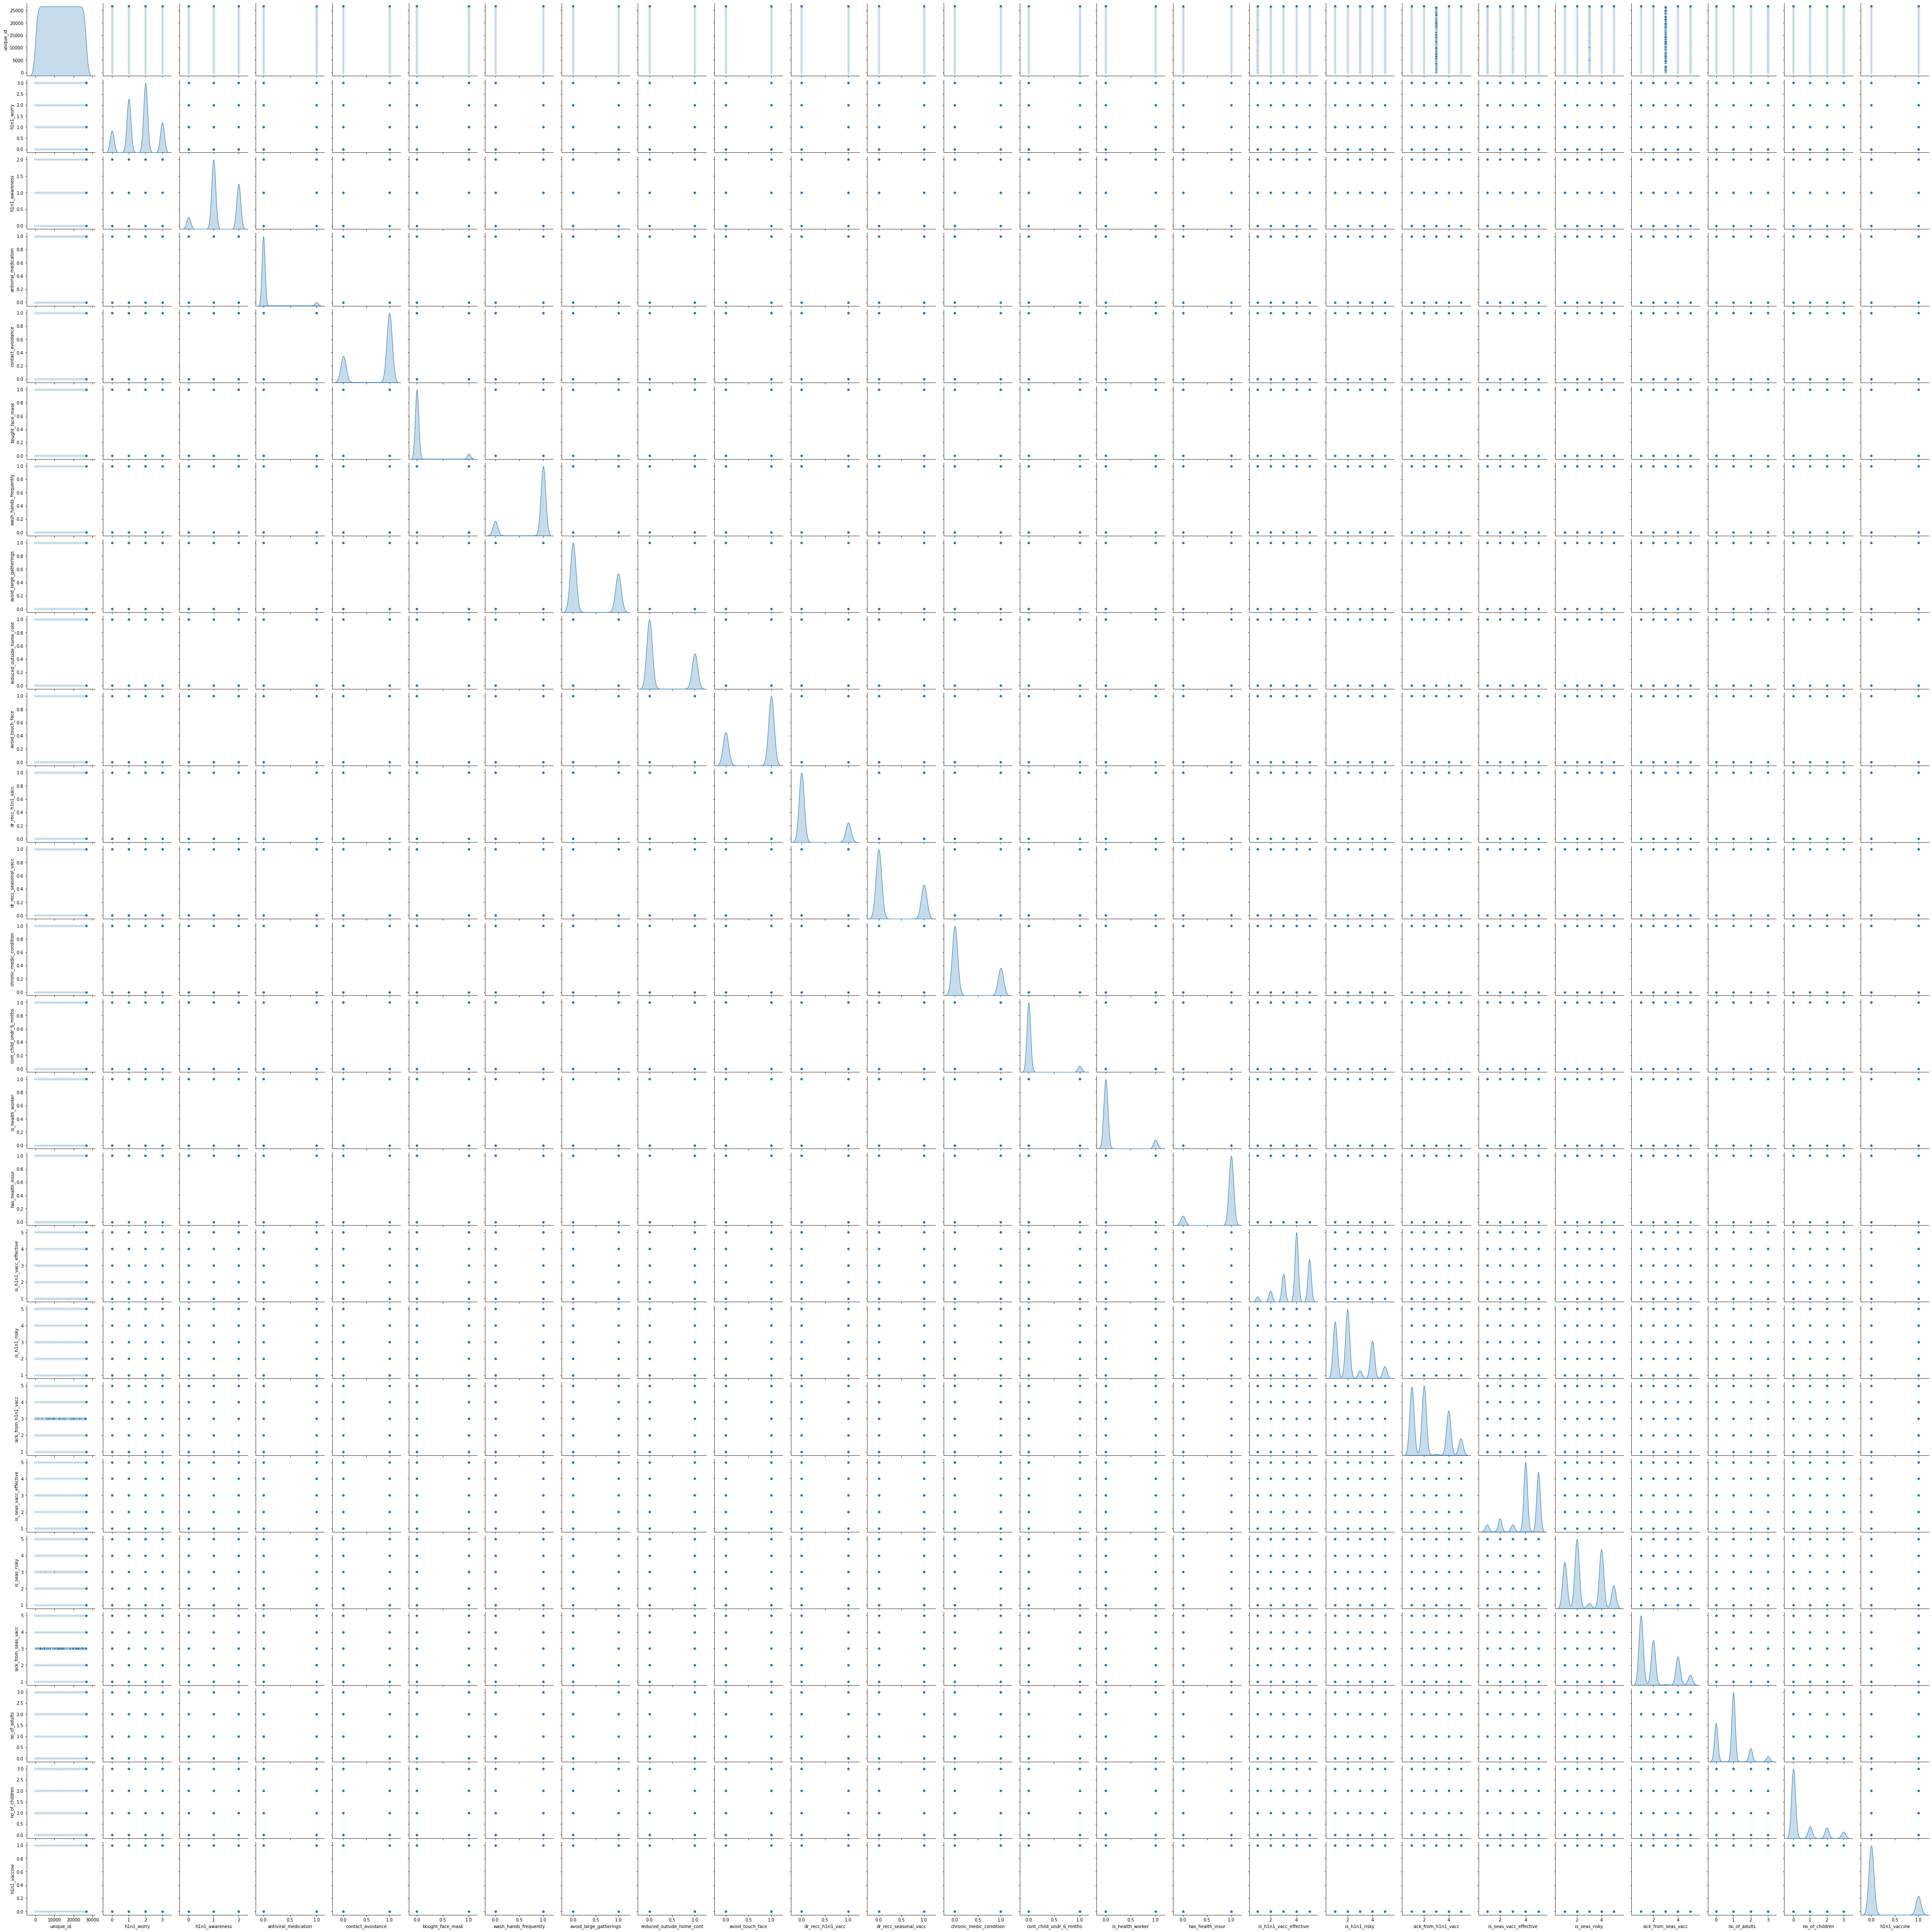

In [16]:
sns.pairplot(df,diag_kind="kde")

In [17]:
df.describe(exclude='number')

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [18]:
#Since all are categorical values we use mode as imputation method to get rid of nan values 

In [19]:
for cat_var in ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'qualification',
        'income_level', 'marital_status', 'housing_status',
       'employment', 'no_of_adults', 'no_of_children']:
    df[cat_var] = df[cat_var].fillna(df[cat_var].mode()[0])
    
    

In [20]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [22]:
df['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [23]:
df['h1n1_vaccine'].unique()

array([0, 1], dtype=int64)

In [24]:
print("Shape of Dataset : ",df.shape)

Shape of Dataset :  (26707, 34)


In [25]:
df['age_bracket'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [26]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [27]:
df['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
      dtype=object)

In [28]:
for cat_var in ['income_level', 'marital_status', 'housing_status', 'employment', 'census_msa']:
    print(df[cat_var].unique()) 

['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
['Not Married' 'Married']
['Own' 'Rent']
['Not in Labor Force' 'Employed' 'Unemployed']
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [29]:
dummies = pd.get_dummies(df[["race","sex","qualification","income_level","marital_status","housing_status","employment","census_msa","age_bracket"]])

In [30]:
df= pd.concat([df,dummies],axis=1)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,1,0,0,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [32]:
df = df.drop(df[["race","sex","qualification","income_level","marital_status","housing_status","employment","census_msa","age_bracket"]],axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [34]:
df.isnull().sum()

unique_id                                 0
h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
has_health_insur                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
sick_from_h1n1_vacc                       0
is_seas_vacc_effective                    0
is_seas_risky                             0
sick_from_seas_vacc                       0
no_of_adults                    

In [35]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'race_Black', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Female', 'sex_Male',
       'qualification_12 Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'income_level_<= $75,000, Above Poverty', 'income_level_> $75,000',
       'income_level_Below Poverty', 'marital_status_Married',
       'marital_status_Not Marr

In [36]:
# for var in ['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
#        'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
#        'avoid_large_gatherings', 'reduced_outside_home_cont',
#        'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
#        'chronic_medic_condition', 'cont_child_undr_6_mnths',
#        'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
#        'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
#        'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
#        'no_of_children', 'h1n1_vaccine', 'race_Black', 'race_Hispanic',
#        'race_Other or Multiple', 'race_White', 'sex_Female', 'sex_Male',
#        'qualification_12 Years', 'qualification_< 12 Years',
#        'qualification_College Graduate', 'qualification_Some College',
#        'income_level_<= $75,000, Above Poverty', 'income_level_> $75,000',
#        'income_level_Below Poverty', 'marital_status_Married',
#        'marital_status_Not Married', 'housing_status_Own',
#        'housing_status_Rent', 'employment_Employed',
#        'employment_Not in Labor Force', 'employment_Unemployed',
#        'census_msa_MSA, Not Principle  City', 'census_msa_MSA, Principle City',
#        'census_msa_Non-MSA', 'age_bracket_18 - 34 Years',
#        'age_bracket_35 - 44 Years', 'age_bracket_45 - 54 Years',
#        'age_bracket_55 - 64 Years', 'age_bracket_65+ Years']:
#     fig,ax = plt.subplots(figsize=(10,6))
#     sns.boxplot(df[var])

#No point of checking for outliers because almost all features are categorical



In [37]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

#for cat_var in ['Gender', 'Married', 'Education']:
    #df[cat_var] = le.fit_transform(df[cat_var]) 

In [38]:
X = df.drop(["h1n1_vaccine"],axis=1)
y = df[["h1n1_vaccine"]]

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30 , random_state = 1)

In [40]:
y_train = y_train.values.ravel()

In [41]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

0.824784724822164

In [42]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))


1.0
0.7588918008236616


In [43]:
model2_reg= DecisionTreeClassifier(max_depth=3,criterion='gini')
model2_reg.fit(X_train,y_train)
print(model2_reg.score(X_train,y_train))
print(model2_reg.score(X_test,y_test))

0.8221889376270461
0.8299014102084113


In [44]:
from sklearn.ensemble import BaggingClassifier
model3 = BaggingClassifier(n_estimators=20,base_estimator=model2_reg)
model3.fit(X_train,y_train)
print(model3.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8226703755215578
0.824784724822164


<AxesSubplot:>

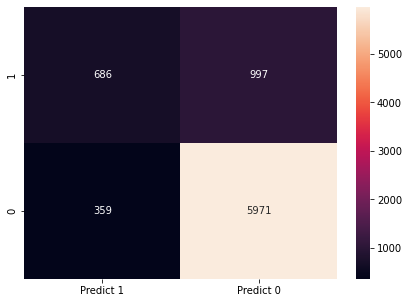

In [45]:
prediction=model3.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,prediction,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in["1","0"]],
                             columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [46]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6330
           1       0.66      0.41      0.50      1683

    accuracy                           0.83      8013
   macro avg       0.76      0.68      0.70      8013
weighted avg       0.81      0.83      0.82      8013



In [61]:
model3 = BaggingClassifier(n_estimators=20)
model3.fit(X_train,y_train)
print(model3.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9950251417567134
0.824784724822164


In [62]:
from sklearn import metrics
prediction = model3.predict(X_test)
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6330
           1       0.65      0.42      0.51      1683

    accuracy                           0.83      8013
   macro avg       0.76      0.68      0.70      8013
weighted avg       0.81      0.83      0.82      8013



In [48]:
model3 = BaggingClassifier(n_estimators=20,max_samples=15,max_features=8)
model3.fit(X_train,y_train)
print(model3.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7907349951856211
0.824784724822164


In [63]:
from sklearn.ensemble import AdaBoostClassifier
model4=AdaBoostClassifier(n_estimators=20)
model4.fit(X_train,y_train)
print(model4.score(X_train,y_train))
print(model4.score(X_test,y_test))

0.830533861131914
0.8400099837763634


<AxesSubplot:>

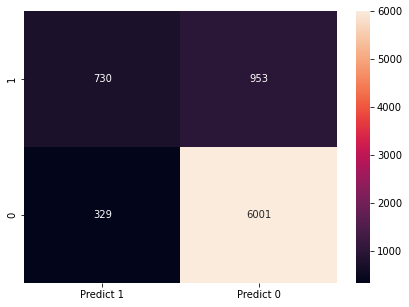

In [64]:
prediction=model4.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,prediction,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in["1","0"]],
                             columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [65]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6330
           1       0.69      0.43      0.53      1683

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013
weighted avg       0.83      0.84      0.83      8013



In [66]:
from sklearn.ensemble import GradientBoostingClassifier
model5=GradientBoostingClassifier(min_samples_split=3,n_estimators=10)
model5.fit(X_train,y_train)
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))

0.8127741521343747
0.8186696617995757


In [67]:
from sklearn import metrics 
prediction = model5.predict(X_test)
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      6330
           1       0.78      0.19      0.31      1683

    accuracy                           0.82      8013
   macro avg       0.80      0.59      0.60      8013
weighted avg       0.81      0.82      0.77      8013



In [68]:
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier(max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=7)
model6.fit(X_train,y_train)
print(model6.score(X_train,y_train))
print(model6.score(X_test,y_test))

0.7988659462929282
0.8013228503681518


In [69]:
from sklearn.svm import SVC
model7=SVC(C=100.0,
    kernel='rbf',
    degree=3)
model7.fit(X_train,y_train)
print(model7.score(X_train,y_train))
print(model7.score(X_test,y_test))

0.786509040333797
0.7899663047547735


In [ ]:
from sklearn.svm import SVC
model7=SVC(C=100.0,
    kernel='poly',
    degree=3)
model7.fit(X_train,y_train)
print(model7.score(X_train,y_train))
print(model7.score(X_test,y_test))

In [ ]:
from sklearn.svm import SVC
model7=SVC()
model7.fit(X_train,y_train)
print(model7.score(X_train,y_train))
print(model7.score(X_test,y_test))

In [ ]:
from sklearn.svm import SVC
model7=SVC(C=1000.0,
    kernel='rbf',
    degree=3)
model7.fit(X_train,y_train)
print(model7.score(X_train,y_train))
print(model7.score(X_test,y_test))

In [ ]:
#DecisionTreeClassifier , BaggingClassifier , AdaBoostClassifier and GradientBoostingClassifier give high score.

In [ ]:
#Higher precision means that an algorithm returns more relevant results than irrelevant ones, 
#and high recall means that an algorithm returns most of the relevant results (whether or not 
#irrelevant ones are also returned).

#The conclusion I derive from data of precision , recall and f1 score is that the model predicts negative (TN) with high 
#precision than the accuracy of prediction of positive values (TP) by AdaBoostClassifier with an accuracy of 84%